# Compressed Sensing for Rasberry Pi

This notebook is used to demonstrate how to reconstruct compressed data from a Raspberry Pi that has been remotely uploaded to Google Drive. Three different compressed sensing reconstruction algorithms were implemented and run on PC. The application was made to the endangered primates Hainan gibbons, a species from Bawangling National Nature Reserve, Hainan, China. A microphone is attached to the Raspberry Pi and records live audio from YouTube. The reconstruction was done with Colab who was able to reconstruct well the original signals. Three compression ratios were evaluated, R=0.10 (90%), R=0.12 (88) and R=0.15 (85%). The microphone records at 44100Hz by default and we resampled the recording to a sample rate of 22050H.

In [1]:
try:
    # mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/ML4Ecology/CS_DRONE/file_on_computer/
except:
    pass

Mounted at /content/drive
/content/drive/MyDrive/ML4Ecology/CS_DRONE/file_on_computer


In [2]:
from reconstruct_2d_helper import *
import IPython

### Sample rate = 22050

In [ ]:
sr =22050

### a. Compression ratio = 90% (R=10% of samples)

In [14]:
R_10=0.10

In [15]:
# Folder and files
folder_name_10 = '/content/drive/MyDrive/ML4Ecology/CS_DRONE/Recording/Gibbon_10.0_22050/'
file_10_1 = '1_ORIG_191656.wav' #original recording
file_10_2 =  '1_RawSpec_191656.pkl' # Original spectrogram
file_10_3 = '1_SPEC_191656.pkl' # Compressed spectrogram
file_10_4 = '1_COMP_191656.pkl' # compressed waveform

Raw spectrogram: (128, 171)
Compressed measurement y: (2189,)
Value of seed: 42
Widht nx_2d: 171
Height ny_2d: 128
Number of sample m_2d: 2189
Total time of reconstruction using lasso: 23.32152907000045 seconds
Mean Squared Error (MSE): 0.3958


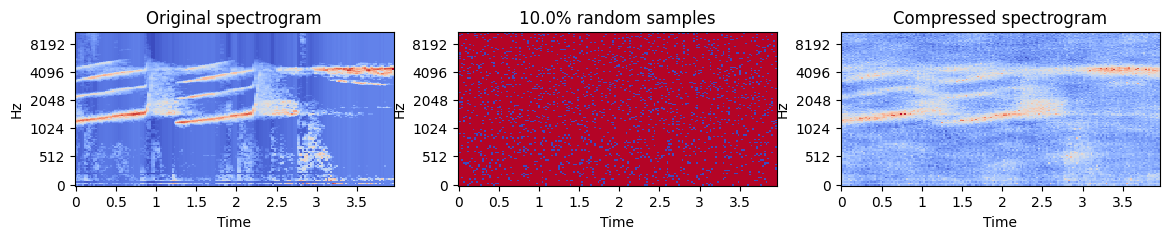

Compressed measurement y: (2189,)
Value of seed: 42
Widht nx_2d: 171
Height ny_2d: 128
Number of sample m_2d: 2189
Total time of reconstruction using omp: 127.16665155200008 seconds
Mean Squared Error (MSE): 0.7296


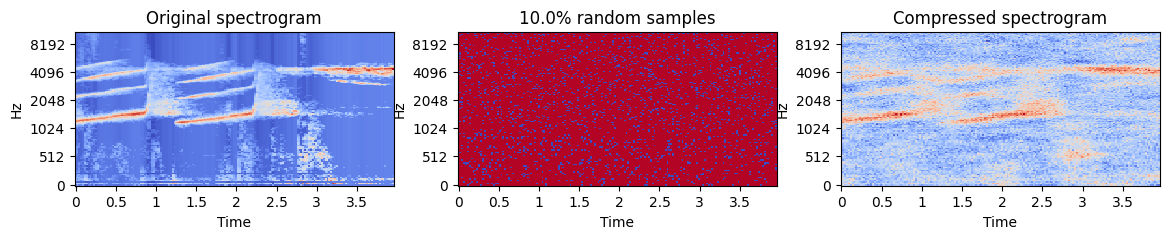

Compressed measurement y: (2189,)
Value of seed: 42
Widht nx_2d: 171
Height ny_2d: 128
Number of sample m_2d: 2189


/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


Total time of reconstruction using cvx: 1102.834449549 seconds
Mean Squared Error (MSE): 0.9004


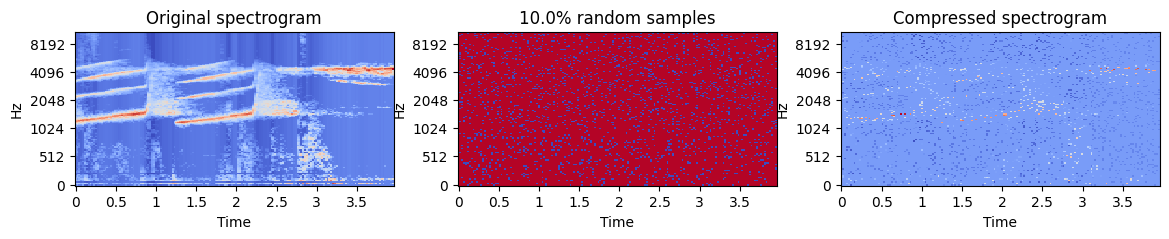

In [16]:
# reconstruction of the spectrogram
X_raw_10 = load_pickle_file(folder_name_10, file_10_2)
X_raw_S_10 = X_raw_10['Y_log_scale']
print('Raw spectrogram:', X_raw_S_10.shape)
original_image = X_raw_S_10 # Your original image data
solvers = ['lasso', 'omp', 'cvx']
X_rec_S_10 = run_reconstruction_2d(original_image, folder_name_10, file_10_3, sr, R_10, solvers)

### b. Compression ratio = 88% (R=12% of samples)

In [6]:
R_12= 0.12

In [7]:
# Folder and files
folder_name_11 = '/content/drive/MyDrive/ML4Ecology/CS_DRONE/Recording/Gibbon_12.0_22050/'
file_12_1 = '1_ORIG_193424.wav' #original recording
file_12_2 =  '1_RawSpec_193424.pkl' # Original spectrogram
file_12_3 = '1_SPEC_193424.pkl' # Compressed spectrogram
file_12_4 = '1_COMP_193424.pkl' # compressed waveform

Raw spectrogram: (128, 171)
Compressed measurement y: (2627,)
Value of seed: 42
Widht nx_2d: 171
Height ny_2d: 128
Number of sample m_2d: 2627
Total time of reconstruction using lasso: 20.640529981999975 seconds
Mean Squared Error (MSE): 0.3315


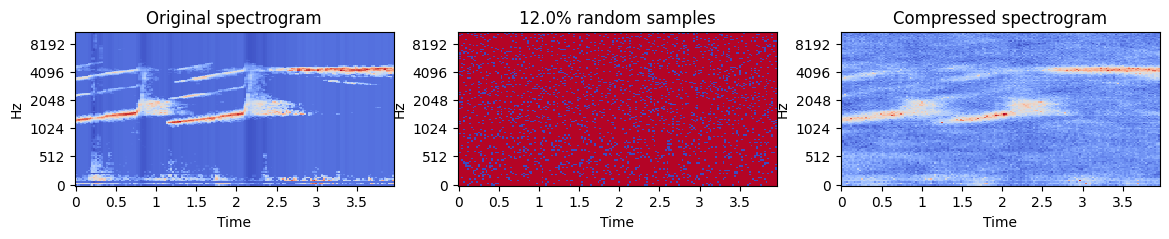

Compressed measurement y: (2627,)
Value of seed: 42
Widht nx_2d: 171
Height ny_2d: 128
Number of sample m_2d: 2627
Total time of reconstruction using omp: 146.58087868 seconds
Mean Squared Error (MSE): 0.5802


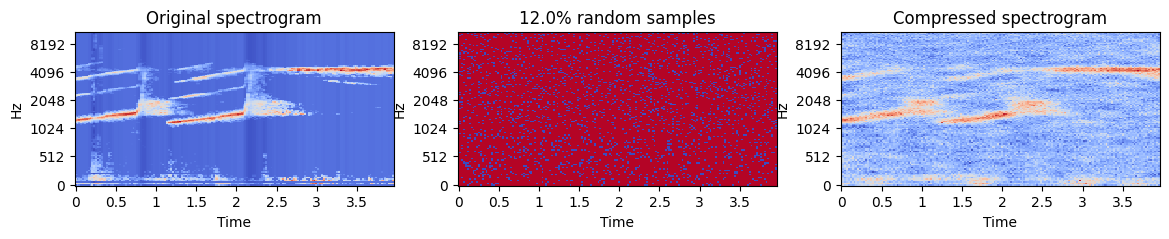

Compressed measurement y: (2627,)
Value of seed: 42
Widht nx_2d: 171
Height ny_2d: 128
Number of sample m_2d: 2627


/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


Total time of reconstruction using cvx: 1407.2018356889998 seconds
Mean Squared Error (MSE): 0.8779


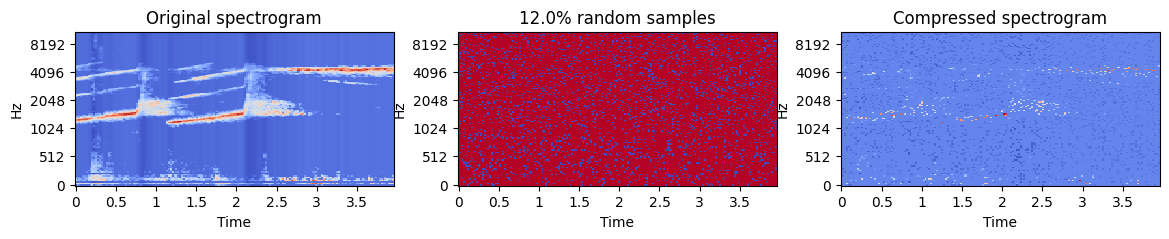

In [8]:
# reconstruction of the spectrogram
X_raw_12 = load_pickle_file(folder_name_12, file_12_2)
X_raw_S_12 = X_raw_12['Y_log_scale']
print('Raw spectrogram:', X_raw_S_12.shape)
original_image = X_raw_S_11 # Your original image data
solvers = ['lasso', 'omp', 'cvx']
X_rec_S_12 = run_reconstruction_2d(original_image, folder_name_12, file_12_3, sr, R_12, solvers)

In [9]:
X_rec_lasso_12=X_rec_S_12[0]
X_rec_omp_12=X_rec_S_12[1]
X_rec_cvx_12=X_rec_S_12[2]

In [12]:
# Spectrogram to Waveform
Spec_to_Wav_12 = librosa.feature.inverse.mel_to_audio(X_rec_omp_12, sr=sr4, n_fft=1024,win_length=1024, hop_length=512)

In [13]:
IPython.display.Audio(Spec_to_Wav_12, rate=sr)

### c. Compression ratio = 85% (R=15% of samples)

In [17]:
R_15= 0.15

In [19]:
# Folder and files
folder_name_15 = '/content/drive/MyDrive/ML4Ecology/CS_DRONE/Recording/Gibbon_15.0_22050/'
file_15_1 = '1_ORIG_193629.wav' #original recording
file_15_2 =  '1_RawSpec_193629.pkl' # Original spectrogram
file_15_3 = '1_SPEC_193629.pkl' # Compressed spectrogram
file_15_4 = '1_COMP_193629.pkl' # compressed waveform

Raw spectrogram: (128, 171)
Compressed measurement y: (3283,)
Value of seed: 42
Widht nx_2d: 171
Height ny_2d: 128
Number of sample m_2d: 3283
Total time of reconstruction using lasso: 27.8849879469999 seconds
Mean Squared Error (MSE): 0.4074


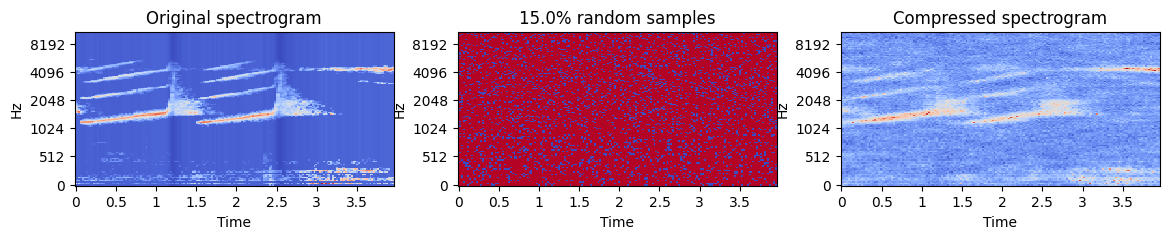

Compressed measurement y: (3283,)
Value of seed: 42
Widht nx_2d: 171
Height ny_2d: 128
Number of sample m_2d: 3283
Total time of reconstruction using omp: 164.59953468999993 seconds
Mean Squared Error (MSE): 0.7949


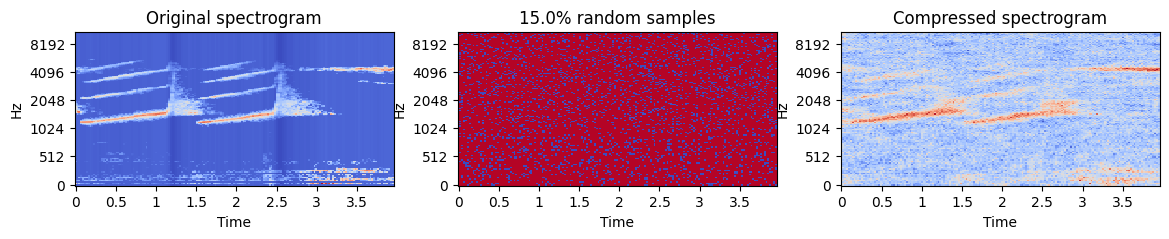

Compressed measurement y: (3283,)
Value of seed: 42
Widht nx_2d: 171
Height ny_2d: 128
Number of sample m_2d: 3283


/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 3 times so far.

  warnings.warn(msg, UserWarning)


Total time of reconstruction using cvx: 2354.7171756850003 seconds
Mean Squared Error (MSE): 0.8447


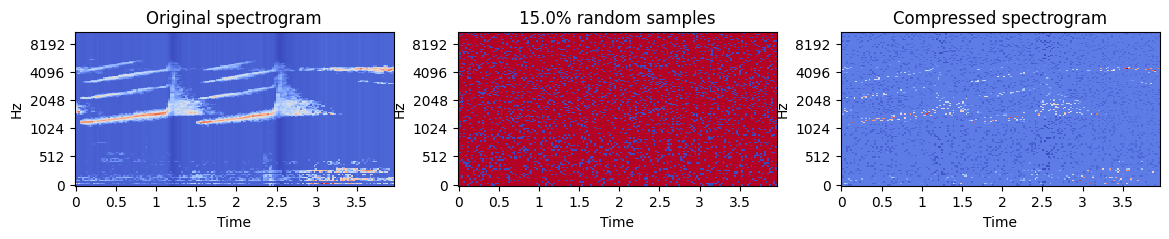

In [20]:
# reconstruction of the spectrogram
X_raw_15 = load_pickle_file(folder_name_15, file_15_2)
X_raw_S_15 = X_raw_15['Y_log_scale']
print('Raw spectrogram:', X_raw_S_15.shape)
original_image = X_raw_S_15 # Your original image data
solvers = ['lasso', 'omp', 'cvx']
X_rec_S_15 = run_reconstruction_2d(original_image, folder_name_15, file_15_3, sr, R_15, solvers)